In [1]:
!pip install bar_chart_race

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
from plotly.subplots import make_subplots
import bar_chart_race as bcr
import seaborn as sns
from datetime import datetime
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import warnings
from sklearn.utils import check_array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [3]:
df_test = pd.read_csv("df_test.csv")
df_train = pd.read_csv("df_train.csv")

In [4]:
display(df_train.info())
display(df_train.head())
display(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               452 non-null    object 
 1   Punjab             452 non-null    float64
 2   Haryana            452 non-null    float64
 3   Rajasthan          452 non-null    float64
 4   Delhi              452 non-null    float64
 5   UP                 452 non-null    float64
 6   Uttarakhand        452 non-null    float64
 7   HP                 452 non-null    float64
 8   J&K                452 non-null    float64
 9   Chandigarh         452 non-null    float64
 10  Chhattisgarh       452 non-null    float64
 11  Gujarat            452 non-null    float64
 12  MP                 452 non-null    float64
 13  Maharashtra        452 non-null    float64
 14  Goa                452 non-null    float64
 15  DNH                452 non-null    float64
 16  Andhra Pradesh     452 non

None

,date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-07,163.9,157.5,180.9,103.8,379.4,33.9,24.2,34.8,4.8,...,89.8,151.8,0.9,2.3,34.2,2.4,5.2,1.6,2.4,4.9
1,2019-01-08,206.1,140.6,223.7,99.3,384.1,42.6,29.4,44.9,5.5,...,82.8,176.5,1.2,2.4,32.7,2.3,5.7,1.5,2.3,5.7
2,2019-01-09,224.0,200.4,240.5,113.9,350.6,40.2,30.5,39.1,5.4,...,109.6,172.8,1.1,2.3,36.1,2.4,5.5,1.7,2.4,5.8
3,2019-01-10,118.9,142.9,208.4,80.7,316.5,34.9,27.8,39.9,3.9,...,88.0,164.8,0.9,1.9,30.2,2.4,5.5,1.7,1.9,4.6
4,2019-01-11,78.2,79.7,159.5,52.4,271.0,20.1,12.1,40.7,2.4,...,72.8,130.3,0.9,1.5,19.2,2.1,3.9,1.5,2.3,3.1


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,142.039602,138.708407,217.582080,83.679425,315.360619,36.118363,26.463053,44.143584,4.153319,84.084735,...,80.645354,139.762389,1.278982,2.105973,25.026770,2.491150,5.614381,1.707301,2.164823,4.127212
std,57.700326,38.387639,27.535143,25.847394,66.168109,6.807511,4.905600,4.712429,1.146986,10.130044,...,11.090794,28.338834,0.365746,0.230654,4.807105,0.225358,0.715828,0.145486,0.144298,0.739352
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,2.400000
25%,103.975000,114.675000,205.425000,63.475000,265.150000,33.800000,25.575000,41.475000,3.300000,75.800000,...,71.600000,114.775000,1.000000,2.000000,22.000000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.800000,127.450000,222.300000,73.750000,290.850000,37.000000,27.900000,43.900000,3.900000,82.750000,...,79.950000,135.150000,1.200000,2.100000,23.600000,2.500000,5.700000,1.700000,2.200000,4.000000
75%,166.075000,162.050000,237.525000,106.700000,372.300000,40.500000,29.600000,47.125000,5.000000,91.800000,...,88.850000,165.850000,1.400000,2.200000,27.800000,2.600000,6.100000,1.800000,2.200000,4.700000
max,291.700000,228.100000,278.000000,147.100000,469.000000,53.200000,34.000000,54.200000,7.200000,111.600000,...,113.000000,198.500000,2.800000,2.600000,38.000000,3.200000,6.800000,2.200000,2.700000,6.600000


In [5]:
display(df_train)
display(df_test)

,date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-07,163.9,157.5,180.9,103.8,379.4,33.9,24.2,34.8,4.8,...,89.8,151.8,0.9,2.3,34.2,2.4,5.2,1.6,2.4,4.9
1,2019-01-08,206.1,140.6,223.7,99.3,384.1,42.6,29.4,44.9,5.5,...,82.8,176.5,1.2,2.4,32.7,2.3,5.7,1.5,2.3,5.7
2,2019-01-09,224.0,200.4,240.5,113.9,350.6,40.2,30.5,39.1,5.4,...,109.6,172.8,1.1,2.3,36.1,2.4,5.5,1.7,2.4,5.8
3,2019-01-10,118.9,142.9,208.4,80.7,316.5,34.9,27.8,39.9,3.9,...,88.0,164.8,0.9,1.9,30.2,2.4,5.5,1.7,1.9,4.6
4,2019-01-11,78.2,79.7,159.5,52.4,271.0,20.1,12.1,40.7,2.4,...,72.8,130.3,0.9,1.5,19.2,2.1,3.9,1.5,2.3,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2020-03-29,106.4,115.6,212.7,66.3,274.4,32.6,26.4,43.6,3.5,...,78.9,125.0,1.0,2.1,24.3,2.5,5.8,1.6,2.3,4.1
448,2020-03-30,106.4,118.0,215.9,66.4,270.5,34.4,27.2,43.3,3.5,...,75.9,128.1,1.2,2.0,25.4,2.6,5.8,1.6,2.3,4.0
449,2020-03-31,106.7,119.6,218.6,67.6,272.9,34.2,27.9,40.1,3.5,...,74.4,125.3,1.3,2.2,24.5,2.5,6.0,1.7,2.1,4.1
450,2020-04-01,248.8,200.9,237.1,116.2,393.1,38.5,28.7,39.7,5.5,...,102.8,164.9,0.7,2.1,30.8,2.5,5.5,1.7,2.2,4.8


,id,date
0,1,2020-04-03
1,2,2020-04-04
2,3,2020-04-05
3,4,2020-04-06
4,5,2020-04-07
5,6,2020-04-08
6,7,2020-04-09
7,8,2020-04-10
8,9,2020-04-11
9,10,2020-04-12


In [6]:
csum = ['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 
       'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu',
       'Pondy', 'Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim',
       'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Tripura']

<AxesSubplot:xlabel='date'>

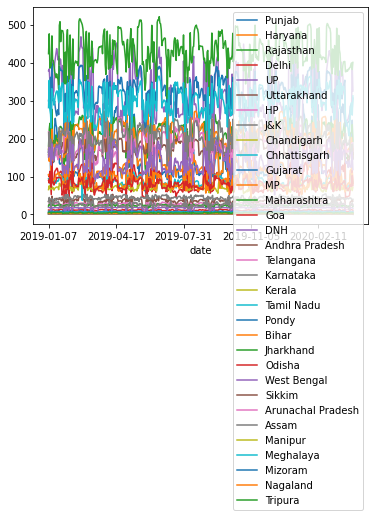

In [7]:
df_train.plot(x="date", y=csum, kind="line")

In [8]:
df_train['total_consumption'] = df_train[csum].sum(axis=1)

In [9]:
df_train = df_train.drop(csum,axis = 1)

In [10]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

In [11]:
display(df_train)
display(df_test)

,date,total_consumption
0,2019-01-07,3423.3
1,2019-01-08,3760.4
2,2019-01-09,3558.6
3,2019-01-10,3235.5
4,2019-01-11,2787.3
...,...,...
447,2020-03-29,3019.2
448,2020-03-30,3072.4
449,2020-03-31,3118.0
450,2020-04-01,3596.5


,id,date
0,1,2020-04-03
1,2,2020-04-04
2,3,2020-04-05
3,4,2020-04-06
4,5,2020-04-07
5,6,2020-04-08
6,7,2020-04-09
7,8,2020-04-10
8,9,2020-04-11
9,10,2020-04-12


In [12]:
print('Minimum date from training set: {}'.format(pd.to_datetime(df_train.date.min()).date()))
print('Maximum date from training set: {}'.format(pd.to_datetime(df_train.date.max()).date()))
print('Minimum date from testing set: {}'.format(pd.to_datetime(df_test.date.min()).date()))
print('Maximum date from testing set: {}'.format(pd.to_datetime(df_test.date.max()).date()))

Minimum date from training set: 2019-01-07
Maximum date from training set: 2020-04-02
Minimum date from testing set: 2020-04-03
Maximum date from testing set: 2020-05-23


In [13]:
max_date_train = pd.to_datetime(df_train.date.max()).date()
max_date_test = pd.to_datetime(df_test.date.max()).date()
lag_size = (max_date_test - max_date_train).days
print('Maximum date from training set: {}'.format(max_date_train))
print('Maximum date from test set: {}'.format(max_date_test))
print('Forecast Lag: {}'.format(lag_size))

Maximum date from training set: 2020-04-02
Maximum date from test set: 2020-05-23
Forecast Lag: 51


<AxesSubplot:xlabel='date'>

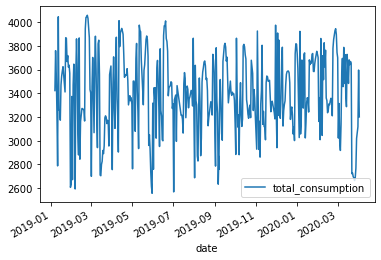

In [14]:
df_train.plot(x="date", y="total_consumption", kind="line")

In [15]:
def series_to_supervised(data, window=1, lag=1, dropnan = True):
    cols, names = list(), list()
    #Input Sequence (t-n, ... t-1)
    for i in range(window-1,0,-1):
        cols.append(data.shift(i))
        names+=[('%s(t-%d)' % (col,i)) for col in data.columns]
    #Current Timestamp (t=0)
    cols.append(data)
    names+=[('%s(t)' % (col)) for col in data.columns]
    #Target Timestamp (t=lag)
    cols.append(data.shift(-lag))
    names+=[('%s(t+%d)' %  (col,lag)) for col in data.columns]
    #Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [16]:
window = 6 #use the last 30 days
lag = 1 #predict the next day
series = series_to_supervised(df_train.drop(['date'], axis=1), window=window, lag=lag)
series.head()

,total_consumption(t-5),total_consumption(t-4),total_consumption(t-3),total_consumption(t-2),total_consumption(t-1),total_consumption(t),total_consumption(t+1)
5,3423.3,3760.4,3558.6,3235.5,2787.3,4046.4,3260.4
6,3760.4,3558.6,3235.5,2787.3,4046.4,3260.4,3261.5
7,3558.6,3235.5,2787.3,4046.4,3260.4,3261.5,3173.5
8,3235.5,2787.3,4046.4,3260.4,3261.5,3173.5,3470.0
9,2787.3,4046.4,3260.4,3261.5,3173.5,3470.0,3546.6


In [17]:
df_train.total_consumption[:7]

0    3423.3
1    3760.4
2    3558.6
3    3235.5
4    2787.3
5    4046.4
6    3260.4
Name: total_consumption, dtype: float64

In [18]:
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
def model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch = config
    df = series_to_supervised(train, window=n_input)
    data = df.to_numpy()
    train_x, train_y = data[:, :-1], data[:, -1]
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    # define model
    model = Sequential()
    model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='nadam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

In [21]:
def model_predict(model, history, config):
    # unpack config
    window, _, _, _ = config
    x_input = np.array(history[-window:]).reshape((1, window, 1))
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return yhat[0]

In [22]:
#walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train.to_numpy()]
    test = test.to_numpy()
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = mean_absolute_percentage_error(test, predictions)
    print(' > %.3f' % error)
    return error

In [23]:
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    return scores

In [24]:
# summarize model performance
def summarize_scores(name, scores):
    # print a summary
    scores_m, score_std = np.mean(scores), np.std(scores)
    print('%s: %.3f MS (+/- %.3f)' % (name, scores_m, score_std))
    # box and whisker plot
    plt.boxplot(scores)
    plt.show()

In [25]:
config = [6, 50, 100, 100]

 > 7.732
 > 7.579
 > 7.722
 > 8.743
 > 7.544
 > 7.984
 > 7.598
 > 7.999
 > 7.318
 > 8.607
 > 7.886
 > 7.987
 > 8.137
 > 6.871
 > 7.881
 > 7.869
 > 7.716
 > 7.991
 > 6.976
 > 7.531
 > 7.033
 > 7.139
 > 7.043
 > 6.937
 > 7.405
 > 7.750
 > 7.579
 > 7.185
 > 7.168
 > 7.044
LSTM: 7.599 MS (+/- 0.466)


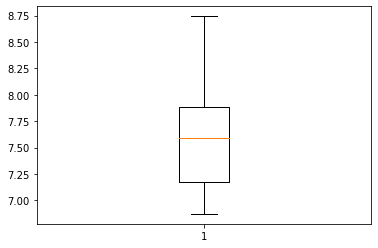

In [26]:
#Training the data
n_test = 136
df1 = df_train.drop(['date'], axis=1)
scores = repeat_evaluate(df1, config, n_test)
summarize_scores('LSTM', scores)

In [31]:
def train_model(data, config):
    n_input, n_nodes, n_epochs, n_batch = config
    df = series_to_supervised(data, window=n_input)
    data = df.to_numpy()
    train_x, train_y = data[:, :-1], data[:, -1]
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    # define model
    model = Sequential()
    model.add(LSTM(n_nodes, activation='relu', input_shape=(window, 1)))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='nadam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

In [28]:
def time_series_forecasting(train, test, config):
    #Drop the unwanted columns
    df = train.drop(['date'], axis=1)
    #Get the window
    window = config[0]
    #Train the model
    model = train_model(df, config)
    #Define the history to be taken into consideration for prediction
    history = [x for x in df.to_numpy()]
    #Define an empty case_count column to be inserted later on
    tc = pd.Series([])
    #One by one do prediction and append it to history and the series.
    for i in range(test.shape[0]):
        x_input = np.array(history[-window:]).reshape((1, window, 1))
        y = model.predict(x_input, verbose=0)
        history.append(y[0])
        tc[i] = y[0][0] #Since number of cases are supposed to be integer
    #Add the calculated column to the dataset
    test.insert(loc=2, column='total_consumption', value=tc)
    return test

In [29]:
test1 = time_series_forecasting(df_train, df_test, config)

<ipython-input-28-4a45f692763c>:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [30]:
test1

,id,date,total_consumption
0,1,2020-04-03,3115.257324
1,2,2020-04-04,3168.566406
2,3,2020-04-05,3200.748779
3,4,2020-04-06,3223.668945
4,5,2020-04-07,3242.682373
5,6,2020-04-08,3186.608643
6,7,2020-04-09,3179.077148
7,8,2020-04-10,3189.740967
8,9,2020-04-11,3194.641113
9,10,2020-04-12,3193.894531


<AxesSubplot:xlabel='date'>

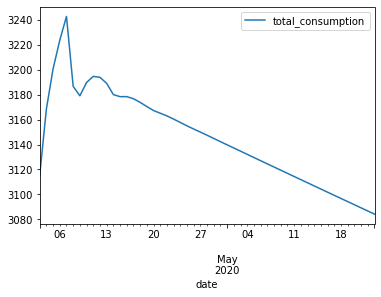

In [32]:
test1.plot(x="date", y="total_consumption", kind="line")